In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import levy

In [16]:
class FlowerPA():
    def __init__(self, switch_probability=0.8, n_flowers=50, const_low=0, const_high=1, fx=None):
        self.fx = fx
        self.n_flowers = n_flowers
        self.flowers = [None]*n_flowers
        self.const_low = const_low
        self.const_high = const_high
        self.cost = np.zeros(n_flowers)
        self.sp = switch_probability
        
        self.init_flowers()
        self.best = self.flowers[self.cost.argmax()]
    
    def objective_function(self, x):
        value_of_fx = self.fx(x)
        cost = 0 - abs(value_of_fx) # the closer to zero, the better
        return cost
    
    def init_flowers(self): #Initialization of flowers
        for i in range(self.n_flowers):
            seed = np.random.rand()
            self.flowers[i] = seed * (self.const_high - self.const_low) + self.const_low
            self.cost[i] = self.objective_function(self.flowers[i])
  
    def global_polination(self,x):
        new_flower = x + levy.rvs() * (x - self.best)
        return new_flower
        
    def local_polination(self,x, xj, xk):
        new_flower = x + np.random.randn()* (xj- xk)
        return new_flower
    
    def start_optimization(self, n_generation=100):
        history = np.zeros((n_generation))
        
        for i in range(n_generation):
            history[i] = self.best
            p = np.random.rand()
            for j in range(self.n_flowers):
                if p < self.sp:
                    new_tmp = self.global_polination(self.flowers[j])
                else:
                    r1 = np.random.randint(0, high = self.n_flowers)
                    r2 = np.random.randint(0, high = self.n_flowers)
                    new_tmp = self.local_polination(self.flowers[j], self.flowers[r1], self.flowers[r2])
                
                cost_tmp = self.objective_function(new_tmp)
                if cost_tmp > self.cost[j]:
                    self.flowers[j] = new_tmp
                    self.cost[j] = cost_tmp
                    
            self.best = self.flowers[self.cost.argmax()]    
        
        return self.flowers, self.cost, history

### Find a root of a given function with FPA 

Find a root of a given function, f(x) = 0 
<br>For example : <i> f(x) = −x^3 + 4x^2 − 2x + 2 = 0 </i>

In [19]:
func  = lambda x : -1*(x**3) + 4 * (x**2) - (2*x) + 2
fpa = FlowerPA(switch_probability=0.6, n_flowers=100,const_low=0, const_high=5, fx=func)
result, cost, hist = fpa.start_optimization(n_generation=300)

In [20]:
print('the root : ', result[cost.argmax()]) 
print('the f(x) : ',  func(result[cost.argmax()]))

the root :  3.5986745859536873
the f(x) :  -9.417044406490049e-07


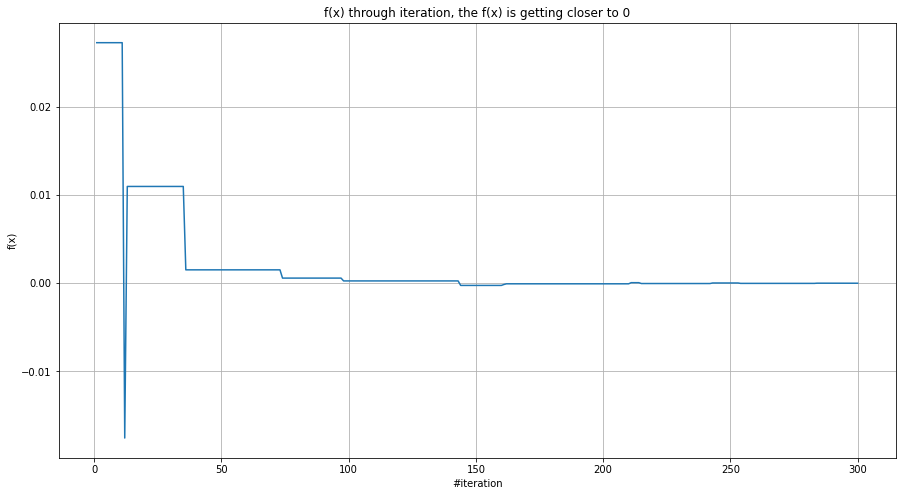

In [32]:
axis_x = np.arange(1, 301, 1)
axis_y = func(hist)
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(axis_x, axis_y)

ax.set(xlabel='#iteration', ylabel='f(x)', title='f(x) through iteration, the f(x) is getting closer to 0')
ax.grid()
plt.show()